#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 08
**CH08A Finding a good deal among hotels with nonlinear function**

using the hotels-vienna dataset

version 1.0 2021-05-05

In [22]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


In [23]:

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch08-hotels-measurement-error/"
output = dirname + "da_case_studies/ch08-hotels-measurement-error/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [24]:

# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)

In [25]:
# load vienna
hotels = pd.read_csv(data_in + "hotels-vienna.csv")
#data = pd.read_csv("https://osf.io/y6jvb/download")

In [26]:
hotels = hotels.loc[
    (hotels["accommodation_type"] == "Hotel")
    & (hotels["city_actual"] == "Vienna")
    & (hotels["stars"] >= 3)
    & (hotels["stars"] <= 4)
    & (hotels["stars"].notna())
    & (hotels["price"] <= 600)
]


#### LOG MODELS

In [27]:
hotels["lnprice"] = np.log(hotels["price"])
hotels["distance2"] = hotels["distance"]
hotels.loc[hotels["distance2"] < 0.05, "distance2"] = 0.05
hotels["lndistance"] = np.log(hotels["distance2"])

In [28]:
hotels["price"].describe()


count    207.000000
mean     109.975845
std       42.221381
min       50.000000
25%       82.000000
50%      100.000000
75%      129.500000
max      383.000000
Name: price, dtype: float64

In [29]:
hotels["lnprice"].describe()


count    207.000000
mean       4.640219
std        0.336751
min        3.912023
25%        4.406719
50%        4.605170
75%        4.863673
max        5.948035
Name: lnprice, dtype: float64

## Regression

In [30]:
reg1 = smf.ols("price ~ distance", data=hotels).fit()
reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     38.20
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           3.39e-09
Time:                        11:53:02   Log-Likelihood:                -1050.3
No. Observations:                 207   AIC:                             2105.
Df Residuals:                     205   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.0170      4.474     29.511      0.000     123.197     140.837
distance     -14.4064      2.331     -6.181      0.000     -19.002      -9.811
==============================================================================
Omnibus:                      141.994   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1560.025
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      15.488   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
reg2 = smf.ols("price ~ lndistance", data=hotels).fit()
reg2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     79.58
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.61e-16
Time:                        11:53:02   Log-Likelihood:                -1034.1
No. Observations:                 207   AIC:                             2072.
Df Residuals:                     205   BIC:                             2079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.4171      2.512     44.757      0.000     107.465     117.369
lndistance   -24.7683      2.777     -8.921      0.000     -30.243     -19.294
==============================================================================
Omnibus:                      175.079   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3501.545
Skew:                           3.084   Prob(JB):                         0.00
Kurtosis:                      22.182   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
reg3 = smf.ols("lnprice ~ distance", data=hotels).fit()
reg3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     52.90
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           7.30e-12
Time:                        11:53:02   Log-Likelihood:                -44.160
No. Observations:                 207   AIC:                             92.32
Df Residuals:                     205   BIC:                             98.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8411      0.035    139.720      0.000       4.773       4.909
distance      -0.1313      0.018     -7.273      0.000      -0.167      -0.096
==============================================================================
Omnibus:                       28.470   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.450
Skew:                           0.746   Prob(JB):                     4.97e-11
Kurtosis:                       4.809   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
reg4 = smf.ols("lnprice ~ lndistance", data=hotels).fit()
reg4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     102.6
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           8.18e-20
Time:                        11:53:02   Log-Likelihood:                -25.911
No. Observations:                 207   AIC:                             55.82
Df Residuals:                     205   BIC:                             62.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6615      0.019    241.926      0.000       4.623       4.699
lndistance    -0.2158      0.021    -10.130      0.000      -0.258      -0.174
==============================================================================
Omnibus:                       47.573   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.794
Skew:                           0.976   Prob(JB):                     1.08e-28
Kurtosis:                       6.335   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 8.1 Regressions of hotel price and distance to the city center

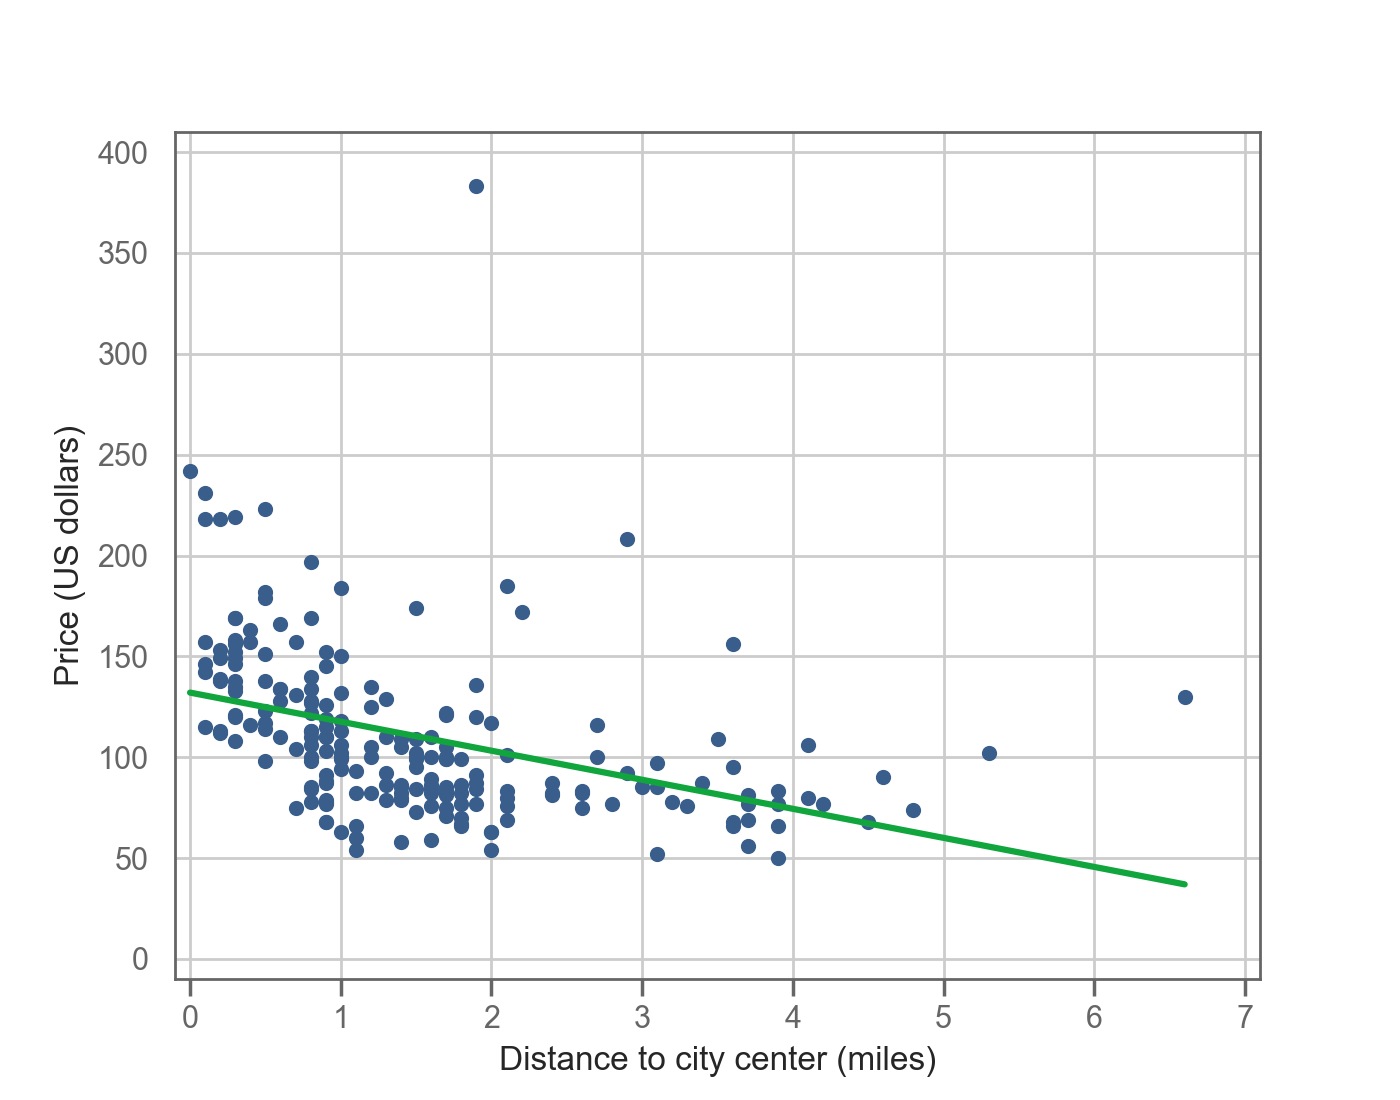

In [34]:
sns.regplot(data=hotels, x="distance", y="price",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("Distance to city center (miles)", fontsize=12)
plt.ylabel("Price (US dollars)", fontsize=12)
plt.xlim(-0.1, 7.1)
plt.xticks(np.arange(0, 7.1, 1))  
plt.ylim(-10, 410)
plt.yticks(np.arange(0, 410, 50))  


plt.show()

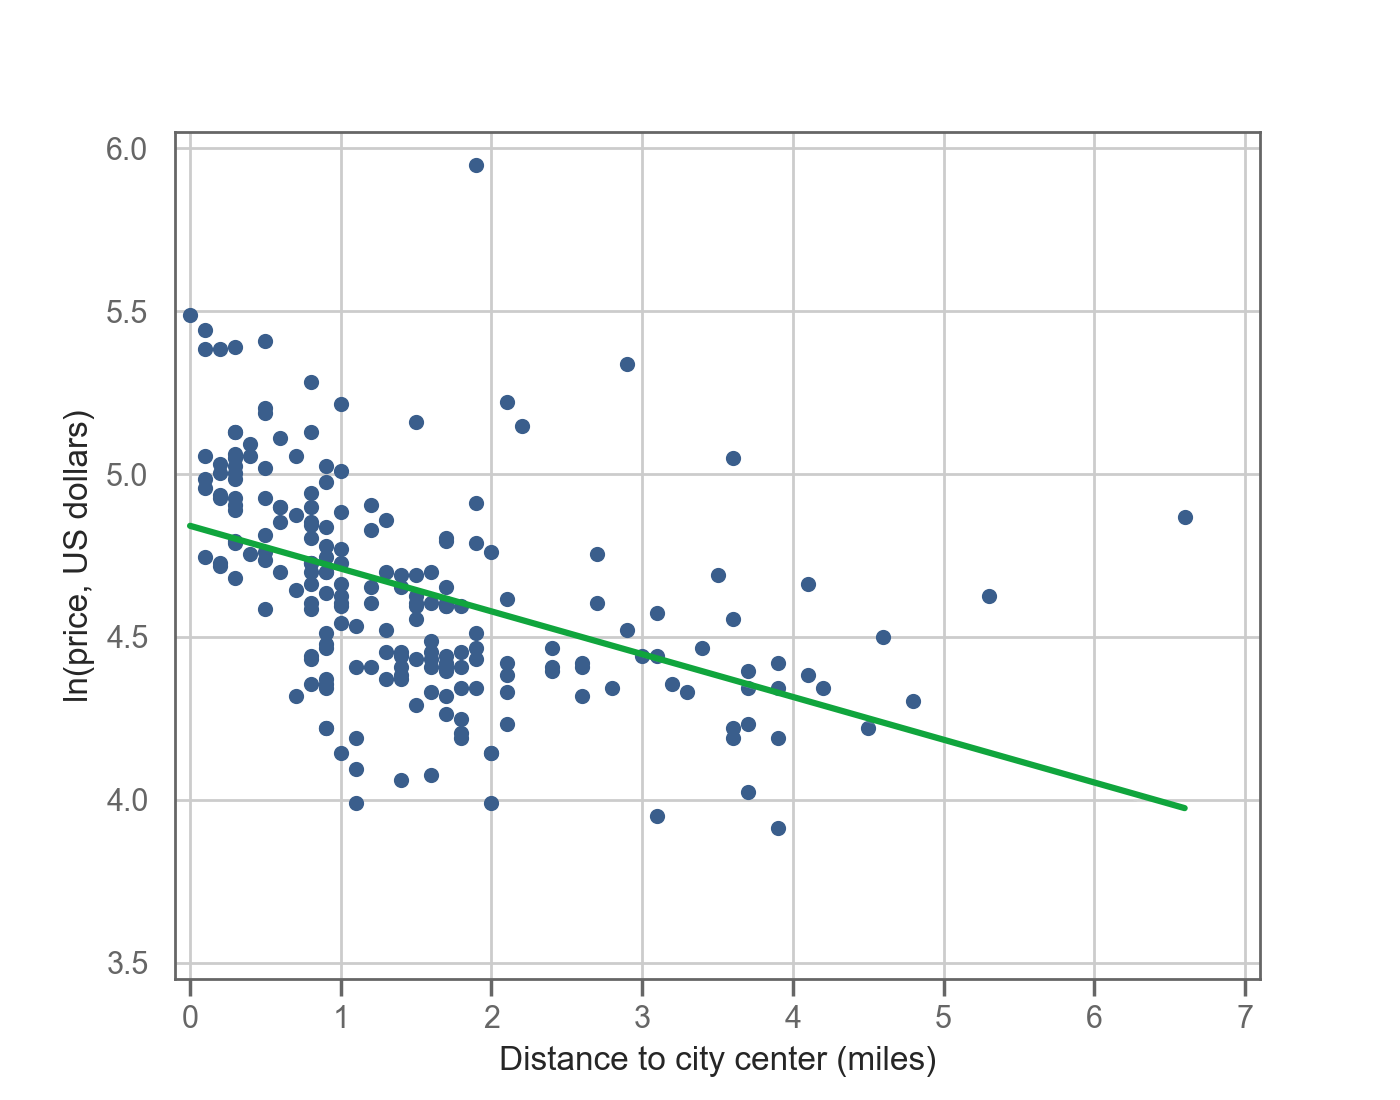

In [35]:
sns.regplot(data=hotels, x="distance", y="lnprice",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("Distance to city center (miles)", fontsize=12)
plt.ylabel("ln(price, US dollars)", fontsize=12)
plt.xlim(-0.1, 7.1)
plt.xticks(np.arange(0, 7.1, 1))  
plt.ylim(3.45, 6.05)
plt.yticks(np.arange(3.5, 6.1, 0.5))  


plt.show()

### Figure 8.2 Regressions of hotel price and distance to the city center

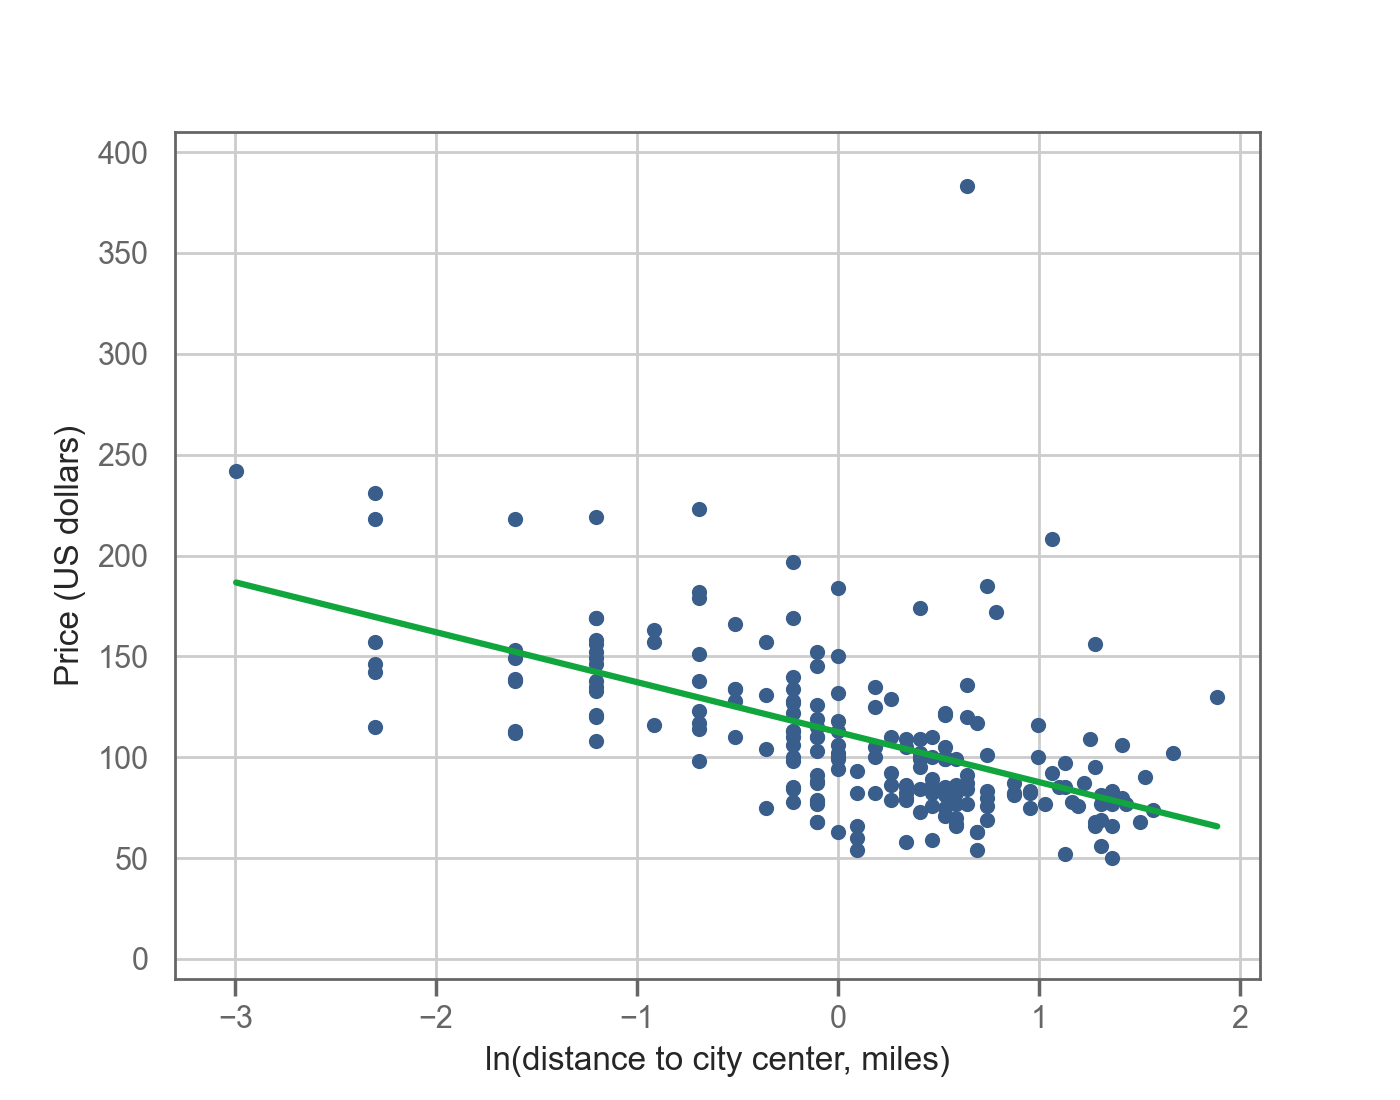

In [36]:
sns.regplot(data=hotels, x="lndistance", y="price",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("ln(distance to city center, miles)", fontsize=12)
plt.ylabel("Price (US dollars)", fontsize=12)
plt.xlim(-3.3, 2.1)
plt.xticks(np.arange(-3, 2.1, 1))  
plt.ylim(-10, 410)
plt.yticks(np.arange(0, 410, 50))  


plt.show()

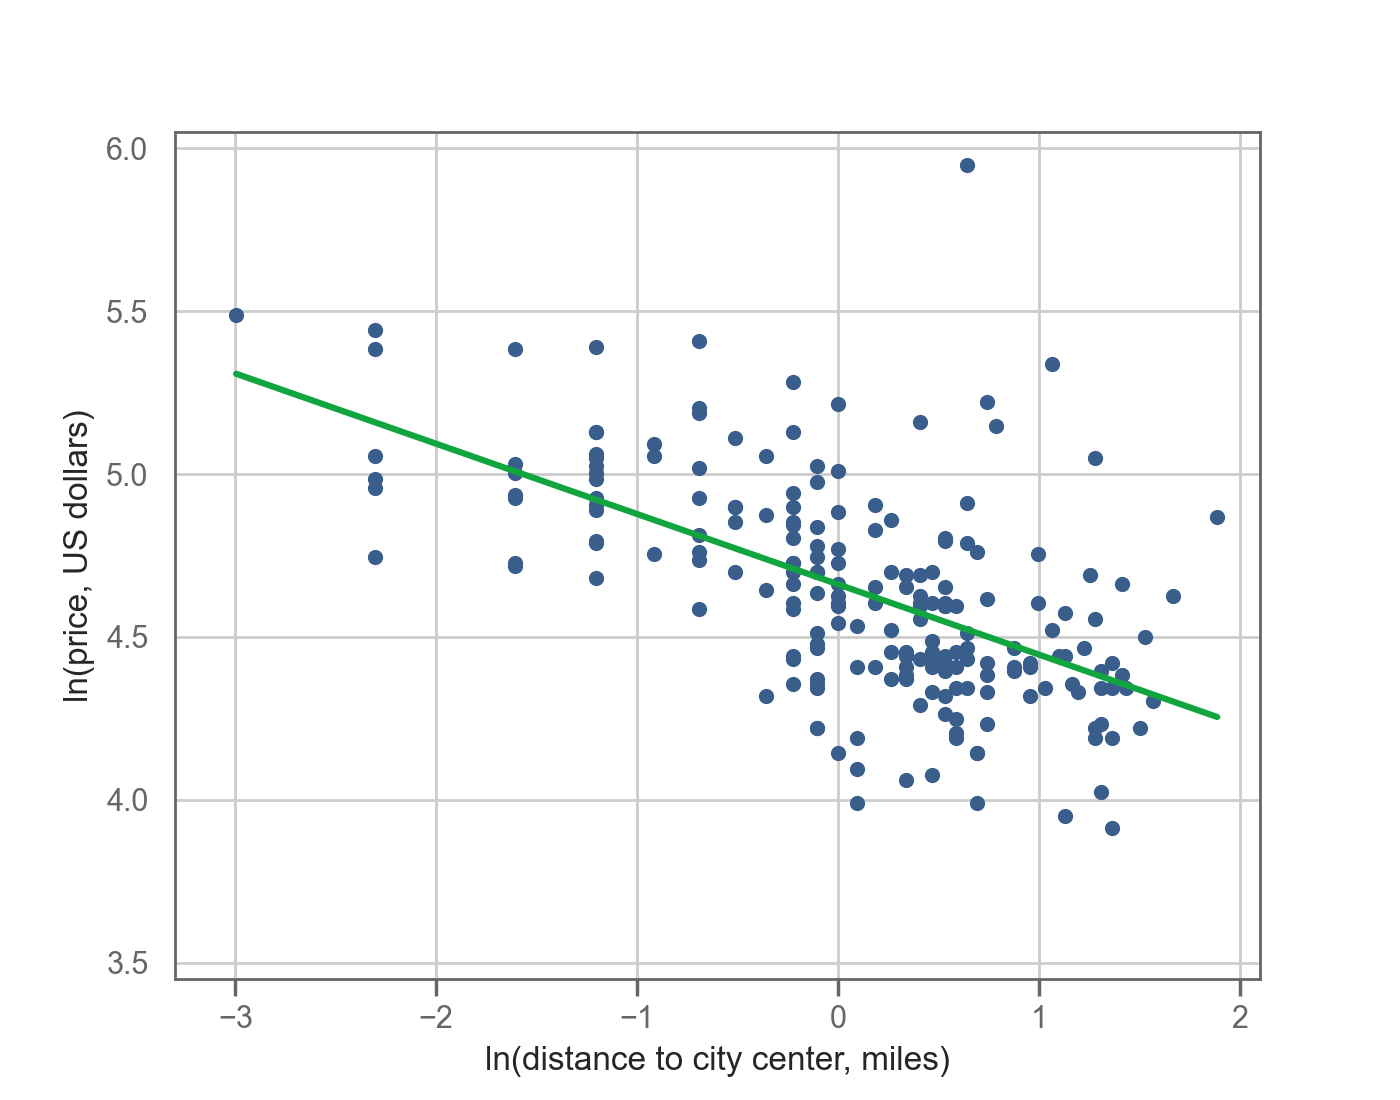

In [37]:
sns.regplot(data=hotels, x="lndistance", y="lnprice",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("ln(distance to city center, miles)", fontsize=12)
plt.ylabel("ln(price, US dollars)", fontsize=12)
plt.xlim(-3.3, 2.1)
plt.xticks(np.arange(-3, 2.1, 1))  
plt.ylim(3.45, 6.05)
plt.yticks(np.arange(3.5, 6.1, 0.5))  


plt.show()

In [38]:
stargazer = Stargazer([reg1, reg3, reg2, reg4])
stargazer.covariate_order(["distance", "lndistance", "Intercept"])
stargazer.custom_columns(["price", "ln(price)", "price", "ln(price)"], [1, 1, 1, 1])
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "distance": "Distance to city center, miles",
        "lndistance": "ln(distance to city center)",
    }
)
stargazer
